# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [7]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load data

In [2]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

You can see details and metadata here, including the meaning of feature
https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-datasetset

In [3]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.031792,2.332642,2.367170,19.701887,98.556604,2.282170,1.981509,0.375755,1.620849,5.150472,0.951321,2.617830,756.915094
std,0.821117,1.126702,0.271797,3.159023,13.749514,0.573592,1.013492,0.124869,0.592705,2.443026,0.216509,0.680315,326.825135
min,11.460000,0.890000,1.700000,12.000000,70.000000,1.250000,0.470000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.632500,2.210000,17.500000,88.000000,1.800000,1.017500,0.270000,1.252500,3.180000,0.802500,1.972500,510.000000
50%,13.135000,1.845000,2.350000,19.500000,97.000000,2.210000,2.035000,0.360000,1.545000,4.800000,0.960000,2.795000,675.000000
75%,13.677500,3.135000,2.580000,21.575000,105.750000,2.787500,2.855000,0.477500,1.970000,6.200000,1.097500,3.167500,1023.750000
max,14.830000,5.650000,3.230000,28.500000,151.000000,3.380000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


Statement: if you perform PCA and maintain all of the principal components, no data is discarded and you did not perform dimensionality reduction.

**Q1 (_max score - 10 points_)** : Do you agree? Explain your answer

No, data can be lost when we perform linear transofrmation on a non linear model (e.g. RandomForest). So even when we have no dimensionality reduction we can lose vital features.

# PCA + Random forest

**Task 1 (_max score - 10 points_)**: Use X_train, y_train to train a random forest with the deafult parameters. You can read more about the algorithm in SKlearn's documentation.
Evaulate the algorithm using accuracy score and X_test, y_test.

In [61]:
scaler = StandardScaler(with_mean=True,with_std=True)

X_train_scaled= scaler.fit(X_train).transform(X_train)
X_test_scaled= scaler.fit(X_test).transform(X_test)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

rf_redicted = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_redicted)

print(f'Random Forest accuracy score: {rf_accuracy:.3}')


rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train_scaled, y_train)

rf_predicted_scaled = rf.predict(X_test_scaled)
rf_accuracy_scaled = accuracy_score(y_test, rf_predicted_scaled)

print(f'Random Forest accuracy score after scaling: {rf_accuracy_scaled:.3}')

Random Forest accuracy score: 0.972
Random Forest accuracy score after scaling: 0.958


**Task 2 (_max score - 10 points_)**: Now do the same, but use PCA.

You are asked to use the **maximal number** of componenets for PCA.
Print the accuracy of Random forest + PCA.

Remeber, you should center and scale your data before you apply PCA.

In [71]:
### from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True,with_std=True)

X_train_scaled= scaler.fit(X_train).transform(X_train)
X_test_scaled= scaler.fit(X_test).transform(X_test)

pca = PCA(13)
pca.fit(X_train_scaled)
X_train_scaled_pca= pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train_scaled_pca, y_train)


predicted_pca = rf.predict(X_test_scaled_pca)
accuracy_pca = accuracy_score(y_test, predicted_pca)

print(f'Random Forest accuracy score: {rf_accuracy:.3}')
print(f'Random Forest accuracy score after scaling: {rf_accuracy_scaled:.3}')
print(f'PCA - Random Forest accuracy score: {accuracy_pca:.3}')

Random Forest accuracy score: 0.972
Random Forest accuracy score after scaling: 0.958
PCA - Random Forest accuracy score: 0.931


**Q2 (_max score - 5 points_)**: By applying PCA, did random forest's results improved\stayed the same\got worse? 

Answer: Accurace score got worse after PCA

# PCA + logistic regression

**Task 3 (_max score - 5 points_)**: repeat task 1 with logistic regression.

In [69]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(max_iter=9999) 
cls.fit(X_train, y_train)

lr_predictions = cls.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print(f'Logistic regression accuracy score: {lr_accuracy:.3}')

cls = LogisticRegression(max_iter=9999) 
cls.fit(X_train_scaled, y_train)

lr_predictions_scale = cls.predict(X_test_scaled)
lr_accuracy_scale = accuracy_score(y_test, lr_predictions_scale)

print(f'Logistic regression accuracy score after scaling: {lr_accuracy_scale:.3}')

Logistic regression accuracy score: 0.944
Logistic regression accuracy score after scaling: 0.986


**Task 4 (_max score - 5 points_)**: repeast task 2 with logistic regression.

In [76]:
scaler = StandardScaler(with_mean=True,with_std=True)

X_train_scaled= scaler.fit(X_train).transform(X_train)
X_test_scaled= scaler.fit(X_test).transform(X_test)

pca = PCA(13)
pca.fit(X_train_scaled)
X_train_scaled_pca= pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

cls = LogisticRegression(max_iter=9999) 
cls.fit(X_train_scaled_pca, y_train)

lr_predictions_pca = cls.predict(X_test_scaled_pca)
lr_accuracy_pca = accuracy_score(y_test, lr_predictions_pca)

print(f'Logistic regression accuracy score: {lr_accuracy:.3}')
print(f'Logistic regression accuracy score after scaling: {lr_accuracy_scale:.3}')
print(f'PCA - Logistic regression accuracy score: {lr_accuracy_pca:.3}')


Logistic regression accuracy score: 0.944
Logistic regression accuracy score after scaling: 0.986
PCA - Logistic regression accuracy score: 0.986


In [168]:
# pca = PCA(2)
# pca.fit(X_train_scaled)
# pca.components_

**Q3 (_max score - 5 points_)**: By applying PCA, Did linear regression results improved\stayed the same\got worse?

Answer: After applying PCA we got same accuracy  as for logistic regresson on scaled data.

**Q4 (_max score - 10 points)**: Explain the differences between answers to Q2 and Q3. 

### Answer: 
After applying PCA (which is linear transformation of the data) we probably  lost the feature which provides the ability to classify the data by random forest model (that is not linear), which resulted in accuracy decrease.
Whereas for LR it wasn't the case since the model is linear, therefore we have no accuracy loss.

**Task 5 (_max score - 20 points_)** Finding the optimal number of components:

Your team decided that you must compress the data and PCA was selected. However, you are not sure how many principal components to have. Implemented the following techniques (should work without human intervention):

1. Keeping at least 50% of the variance with minimum number of components
2. Keeping above average components only
3. The number of componets which maximize the accuracy of Logistic regression on the test set. Components which improve the accuracy by less than 0.001 are not considered as contributing

In [77]:
pca.explained_variance_ , pca.explained_variance_ratio_, pca.explained_variance_ratio_.cumsum()

(array([5.00900277, 2.53210518, 1.47763617, 0.86686582, 0.82500463,
        0.65872266, 0.4910032 , 0.35874665, 0.27833778, 0.19873418,
        0.18689552, 0.14436121, 0.09639375]),
 array([0.38167293, 0.1929398 , 0.11259202, 0.06605291, 0.0628632 ,
        0.05019295, 0.03741316, 0.02733556, 0.02120861, 0.01514303,
        0.01424095, 0.01099995, 0.00734495]),
 array([0.38167293, 0.57461273, 0.68720474, 0.75325765, 0.81612085,
        0.8663138 , 0.90372696, 0.93106251, 0.95227113, 0.96741415,
        0.9816551 , 0.99265505, 1.        ]))

In [127]:


avg_var = np.var(X_train_scaled)

for index, item in enumerate(pca.explained_variance_ratio_.cumsum()):
    if item > 0.5:
        break
print ('1. Minimum number of components for keeping at least 50%% varience is %s'  %(index+1))

for index, item in enumerate(pca.explained_variance_):
    if item < avg_var:
        break

print ('2. For keeping components above average of %s  we need %s components'  %(avg_var, index))

scores = {}
for index in range(13):
    components_num = index+1
    pca_test = PCA(components_num)
    pca_test.fit(X_train_scaled)
    X_train_scaled_pca= pca_test.transform(X_train_scaled)
    X_test_scaled_pca = pca_test.transform(X_test_scaled)
    cls = LogisticRegression(max_iter=9999) 
    cls.fit(X_train_scaled_pca, y_train)
    lr_predictions_pca = cls.predict(X_test_scaled_pca)
    lr_accuracy_pca = accuracy_score(y_test, lr_predictions_pca)
    scores[components_num] = lr_accuracy_pca

    
init_score = scores[13]
for index in reversed(range(13)):
    if init_score - scores[index] > 0.001:
        optimized_num = index + 1
        break
print ('3. The number of componets which maximize the accuracy of Logistic regression on the test set is %s with accuracy score of %s'  %(optimized_num, scores[optimized_num]))


1. Minimum number of components for keeping at least 50% varience is 2
2. For keeping components above average of 1.0  we need 3 components
3. The number of componets which maximize the accuracy of Logistic regression on the test set is 7 with accuracy score of 0.9861111111111112


In [257]:
# pca_test.explained_variance_ , pca_test.explained_variance_ratio_, pca_test.explained_variance_ratio_.cumsum()
# pca_test.components_.shape
scores

# pca = PCA(1)
# pca.fit_transform(X_train_scaled).shape , X_train_scaled.shape
# pca.components_.shape

(1, 13)

# Eigenfaces

The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. Wikipedia: https://en.wikipedia.org/wiki/Eigenface

The following code illustrates what each eigenface stands for. Follow the code and the comments:

Total dataset size:
n_samples: 1288
n_features: 1850
Extracting the top 25 eigenfaces from 1288 faces


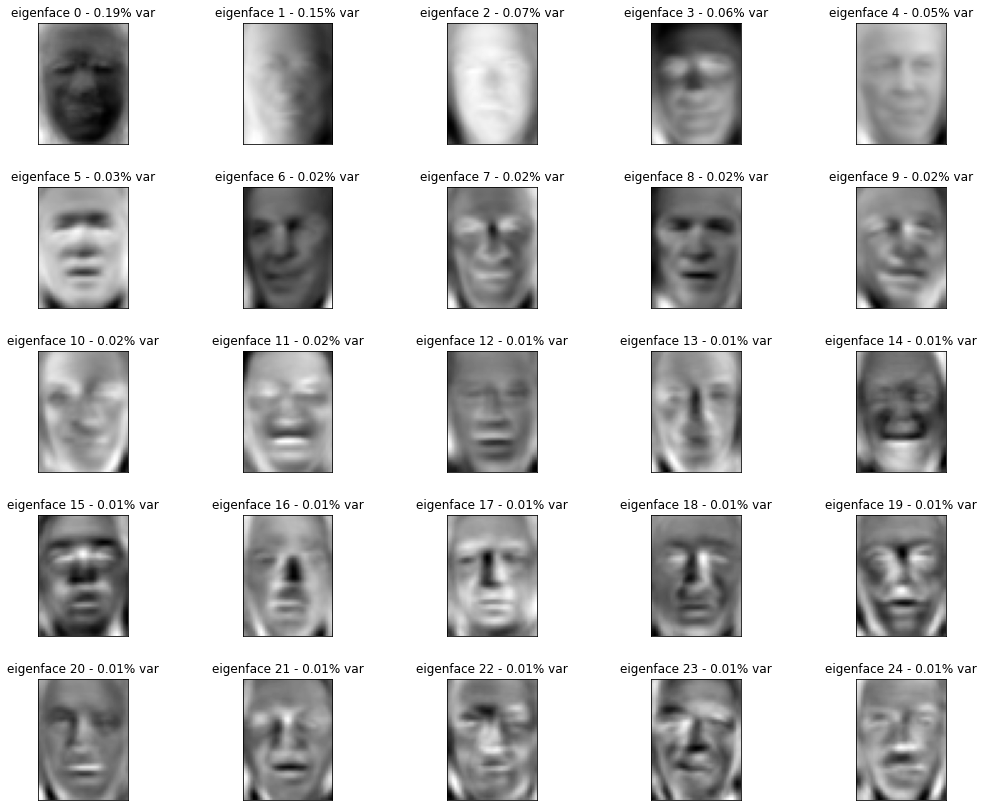

In [290]:
from time import time
import logging
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.svm import SVC


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)



# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 25
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X)

eigenfaces = pca.components_.reshape((n_components, h, w))

# Helper function
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(2.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
#         plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

#############################################################################
# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface {} - {:3.2f}% var".format(i, pca.explained_variance_ratio_[i]) for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=5, n_col=5)


**Task 6 (_max score - 20 points_)**: Plot the reconstruction of an image with different number of principal components used (1 to 30 components). However, for effiency, you are not allowed to refit the PCA object.

The resulting plot will allow us to understand the contribution of each principal component.
Check the result for different images

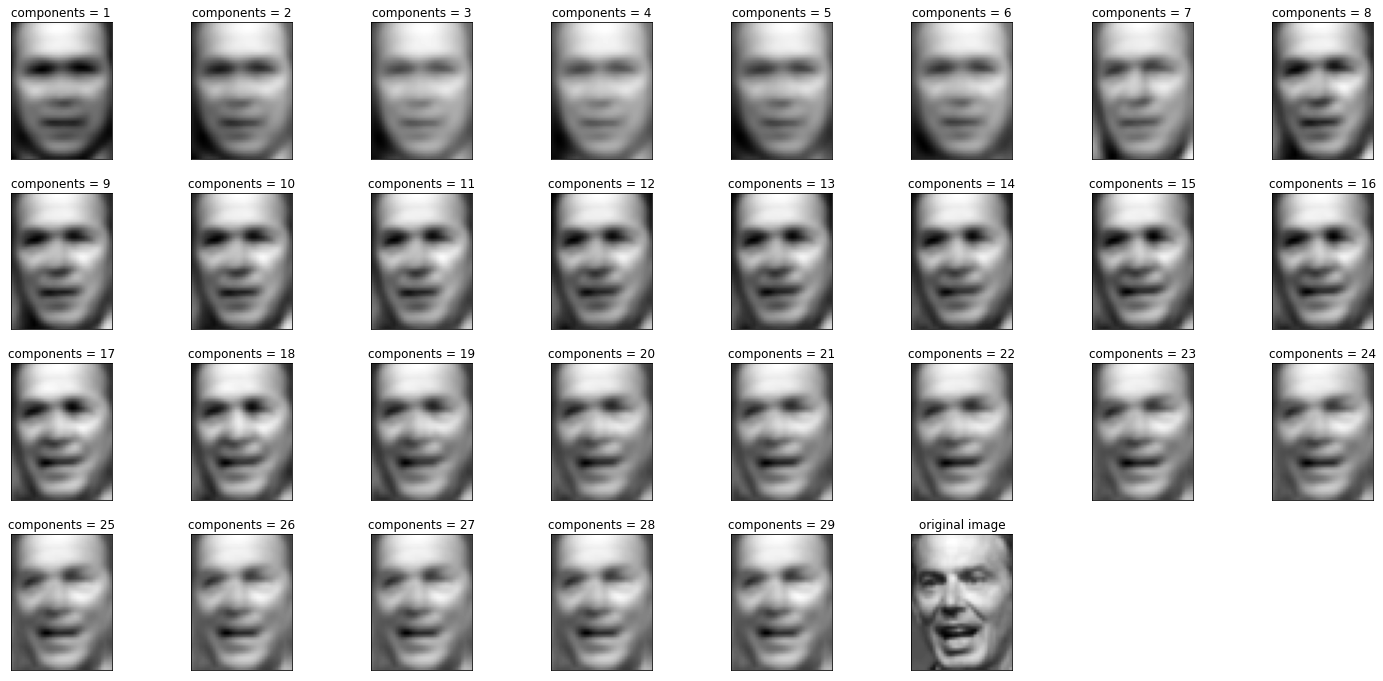

In [321]:
# For a specific image, see how adding PCs affect the reconstruction
image_num = 1
pic = X[image_num] # choose any arbitrary image
numPCs = 30

plt.figure(figsize=(20,10))
# plt.figure(figsize=(1.8 * numPCs/5, 2.4 * 5))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.25)
n_row = 4
n_col = 8

for i in range(1, numPCs+1):
    ### Take the first i principal components
    # Your code here
    pca = PCA(n_components=i, svd_solver='randomized',whiten=True)
    
    ### Reduce the dimensionality of the image
    # Your code here
    transformed = pca.fit_transform(X)
    
    ### Reconstruct the image to the original dimension
    # Your code here
    reduced = pca.inverse_transform(transformed)

    ### Plot the image
    plt.subplot(n_row, n_col, i)
    plt.imshow(reduced[image_num].reshape(h, w), cmap=plt.cm.gray)
    plt.title('components = %s' %i, size=12)
    plt.xticks(())
    plt.yticks(())
    # You are not allowed to refit the pca object
    # Hint: take a look at sklearn's PCA transform and inverse_transform implementation
plt.subplot(n_row, n_col, i)
plt.imshow(X[image_num].reshape(h, w), cmap=plt.cm.gray)
plt.title('original image', size=12)
plt.xticks(())
plt.yticks(())
plt.show()

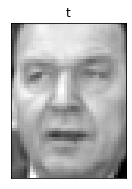

In [320]:
# from numpy import zeros, newaxis
# plot_gallery(X[300].reshape(h, w), "test", h, w, n_row=1, n_col=1)
eigenfaces[0].shape

lfw_people.images.shape
X.shape[1]
n_samples
eigenfaces.shape , X.shape

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)
pca.components_.shape
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenfaces.shape , pca.components_.shape
eigenfaces[0].reshape((h, w)).shape
eigenfaces[0].shape 
X[300].reshape(h, w).shape
type(eigenfaces)
np.array(X[300]).shape
X[300].shape
eigenfaces.shape 
arr = X[300]
np.reshape(arr, arr.shape + (1,)).T.shape ,eigenfaces.shape 
np.reshape(arr, arr.shape + (1,)).T.reshape(1,h, w).shape
# plot_gallery(np.reshape(arr, arr.shape + (1,)).T.reshape(1,h, w), "test", h, w, n_row=1, n_col=1)
# plot_gallery(np.reshape(arr, arr.shape + (1,)).T, "test", h, w, n_row=1, n_col=1)
X[300].reshape(X[300].shape)
X[300][:, np.newaxis].T.shape
# plot_gallery(X[300][:, np.newaxis].T, "test", h, w, n_row=1, n_col=1)

# for i in range(2):
#     plot_gallery(X[i][:, np.newaxis].T, "test", h, w, n_row=1, n_col=1)

plot_gallery(X[300][:, np.newaxis].T, "test", h, w, n_row=1, n_col=1)
# n_row=2
# n_col =2
# plot_gallery(X[i][:, np.newaxis].T, "test", h, w, n_row, n_col)
# x[:2,:]


